# 소셜 네트워크 분석

## 1. 소셜 미디어

인터넷의 탄생으로 사람들이 온라인으로 연결되기 시작하였고 이어 페이스북과 같은 여러 SNS가 생기면서 사람들은 소셜 미디어를 통해 자신들의 네트워크를 구축하고 소통하며 정보를 주고 받기 시작했다. 그다음 스마트폰의 탄생으로 더욱 많은 사람들이 온라인에서 관계를 맺기 시작하였다.

소셜 미디어는 여러 목적에 맞게 다양한 서비스를 제공하고 있다. 크게 4가지 유형으로 나눌 수 있는데, 관계형, 소통형, 공유형, 협업형이 있다. 대표적으로 가장 흔하게 사용되는 유형은 관계와 소통형인 페이스북과 카카오톡 같은 서비스이며 이는 주로 인적 네트워크 중심적이인 유형이다. 

## 2. 소셜 네트워크

소셜 네트워크란 소셜 미디어 서비스들을 이용하여 사람들과 연결되고 사람뿐만이 아닌 토픽, 비즈니스, 기업과 같은것과도 연결되어 하나의 거미줄 같이 서로의 상호 관계를 나타낼 수 있는 사회 연결망이다.

소셜 미디어의 확산으로 사람들의 인적 네트워크에도 많은 변화가 생겼다. 사람들은 자신과는 평생 관계없이 지냈을만한 사람들과도 관계를 형성하기도 하고 SNS에서 인플루언서들은 이전과는 다른 방식으로 사회의 영향을 주고 있다. 그리고 데이터를 통해 보다 객관적으로 사람들간에, 기업들간에 그 무엇이든간에 상호작용을 측정할 수 있게 되었다. 피터 드러커의 "측정할 수 없으면 관리할 수 없고 관리할 수 없으면 개선할 수 없다"는 말이 소셜 네트워크에서도 적용되는 것이다.

### 2.1 소셜 네트워크 분석 사례

소셜 네트워크 분석에 대해 알아보기 전에 간단한 소셜 네트워크 분석 사례를 보고자 한다.
유명한 영국 드라마 왕좌의 게임의 원작 소설인 George R. R. Martin의 시리즈 \<A Song of Ice and Fire> 에서 나오는 인물간에 관계를 네트워크로 표현하였다.

분석에 사용된 데이터는 Macalester College의 Andrew J. Beveridge 교수와 Jie Shan이라는 학부생이 자신들의 분석에 사용할 데이터들을 직접 수집한것이다. 그들의 분석들을 [웹사이트](https://networkofthrones.wordpress.com/)에서 확인할 수 있고 분석에 사용한 관계 [데이터](https://github.com/mathbeveridge/asoiaf)들을 모두 공개하고 있다.

In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import seaborn as sns

In [2]:
books = []
for i in range(1, 6):
    books.append(pd.read_csv(f'data/asoiaf-book{i}-edges.csv'))

In [3]:
whole_series = pd.concat(books)
whole_series.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


In [4]:
edges = whole_series.groupby(['Source', 'Target']).agg({'weight': 'sum'}).reset_index()
edges.sort_values('weight', ascending=False).head()

,Source,Target,weight
1334,Eddard-Stark,Robert-Baratheon,334
2031,Jon-Snow,Samwell-Tarly,228
1965,Joffrey-Baratheon,Sansa-Stark,222
1972,Joffrey-Baratheon,Tyrion-Lannister,219
640,Bran-Stark,Hodor,209


In [5]:
GOT = nx.from_pandas_edgelist(
    edges,
    source='Source',
    target='Target',
    edge_attr='weight',
)

In [6]:
print(nx.info(GOT))

Graph with 796 nodes and 2823 edges


In [7]:
weighted_degrees = dict(nx.degree(GOT, weight='weight'))
max_degree = max(weighted_degrees.values())
sorted(weighted_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

[('Tyrion-Lannister', 2873),
 ('Jon-Snow', 2757),
 ('Cersei-Lannister', 2232),
 ('Joffrey-Baratheon', 1762),
 ('Eddard-Stark', 1649)]

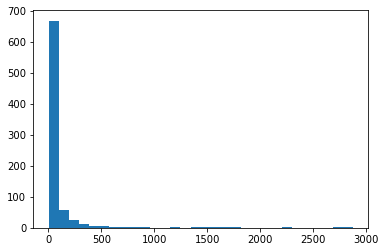

In [8]:
h = plt.hist(weighted_degrees.values(), bins=30)

In [9]:
weighted_degrees_above_200 = [x for x in weighted_degrees if weighted_degrees[x]>200]
SUB_G = GOT.subgraph(weighted_degrees_above_200)

In [10]:
print(nx.info(SUB_G))

Graph with 63 nodes and 496 edges


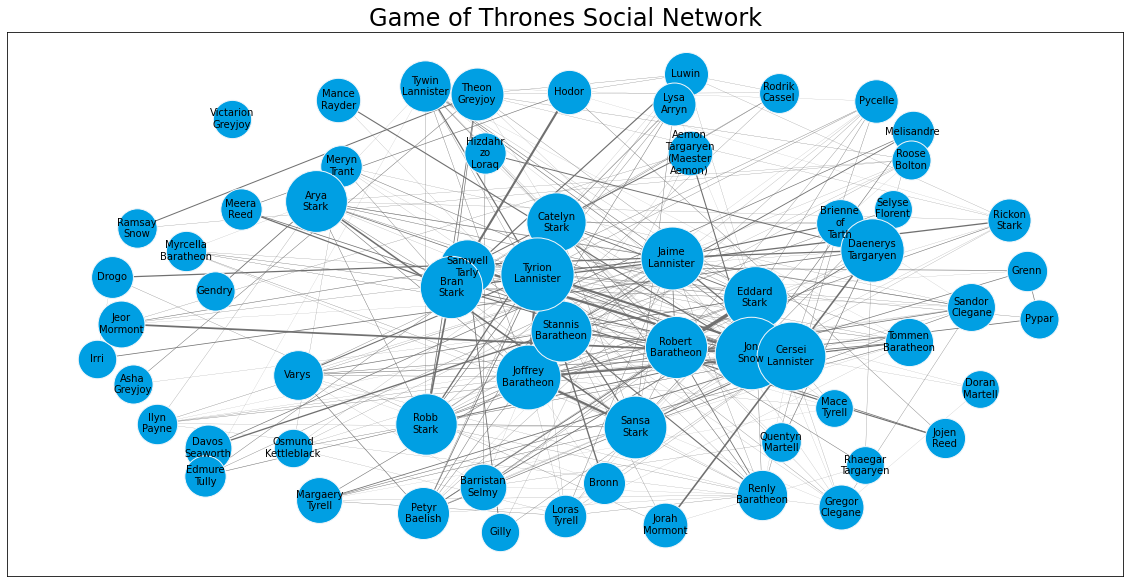

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
plt.axis
plt.title('Game of Thrones Social Network', fontsize=24)

layout = nx.spring_layout(SUB_G, weight='weight', iterations=20, k=4)
for node in SUB_G.nodes():
    size = 100 * weighted_degrees[node]**0.5
    sky_blue = '#009fe3'
    ns = nx.draw_networkx_nodes(SUB_G, layout, nodelist=[node], node_size=size, node_color=sky_blue)
    snow = '#f2f6fa'
    ns.set_edgecolor(snow)
    
labels = {x: x.replace('-', '\n') for x in SUB_G.nodes() if weighted_degrees[x]>100}
nx.draw_networkx_labels(SUB_G, layout, labels=labels, font_size=10)

WEIGHT_COLUMN = 2
for edge in SUB_G.edges(data=True):
    edge_weight = edge[WEIGHT_COLUMN]['weight']
    if edge_weight > 10:
        width = edge_weight/100
        dark_grey = '#707070'
        nx.draw_networkx_edges(SUB_G, layout, edgelist=[edge], width=width, edge_color=dark_grey)

### 2.2 네트워크 이론의 기초

#### 2.2.1 네트워크란

**네트워크**란 어떠한 것들이 서로 연결되어 하나의 구조를 이루는 것을 말한다. 네트워크에 예로 컴퓨터 네트워크, 교통 노선도 등이 있다.

네트워크는 그래프 이론의 시초로 알려져있는 유명한 오일러의 '쾨니히스베르크 다리 건너기 문제'를 시작으로 수많은 연구들이 진행되었고 밀그램의 '6단계 분리 이론', 그라노베터의 '약한 연결의 힘', 프리만의 '중심성 지표' 등이 대표적이다.

네트워크는 **정점**과 **간선**으로 이루어져 있다.
정점이란 고유한 속성을 가지고 있는 행위자이며 **node, vertex**라고도 불리며 간선이란 정점들 간의 관계를 나타내주며 **link, edge**라고도 불린다.
네트워크는 이러한 노드들이 수많은 링크들로 연결되어 있는 것이다.

**그래프 이론**이란 **노드**와 **링크**들을 수학적으로 연구하는 이론으로 수학과 전산학 분야에서 많이 사용되고 있다. 이런 그래프 이론에서 네트워크 이론이 생겨났고 현재 사회 여러 분야에서 사용되고 있다.

#### 2.2.2 그래프의 종류

**무방향 그래프 (undirected graph)**

두 정점을 연결하는 간선의 방향이 없는 그래프

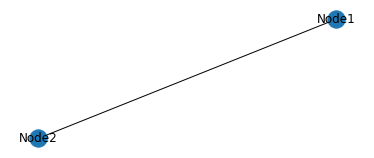

In [12]:
plt.rcParams["figure.figsize"] = (5,2)
G=nx.Graph()
G.add_edge("Node1", "Node2")
nx.draw(G, with_labels = True)
plt.show()

**방향 그래프 (directed graph)**

두 정점을 연결하는 간선의 방향이 있는 그래프

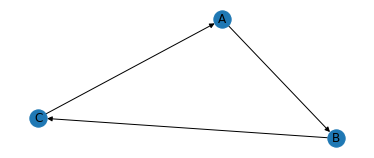

In [13]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ('A', 'B'),
        ('B', 'C'),
        ('C', 'A')
    ]
)
nx.draw(G, with_labels = True)
plt.show()

**이진 그래프 (binary graph)**

관계의 존재 유무 정보만 표현한 그래프

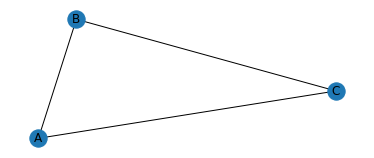

In [14]:
G=nx.Graph()
G.add_edges_from(
    [
        ('A', 'B'),
        ('B', 'C'),
        ('C', 'A')
    ]
)
nx.draw(G, with_labels = True)
plt.show()

**가중 그래프 (value graph)**

관계의 강도까지 표현한 그래프

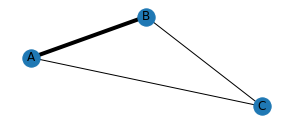

In [15]:
G = nx.Graph()

G.add_edge("A", "B", weight=0.6)
G.add_edge("B", "C", weight=0.2)
G.add_edge("C", "A", weight=0.1)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)
# nodes
nx.draw_networkx_nodes(G, pos)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, edge_color='black'
)
# labels
nx.draw_networkx_labels(G, pos)

ax = plt.gca()
plt.axis("off")
plt.show()

#### 2.2.3 그래프의 표현 방식

그래프를 컴퓨터가 인식할 수 있으려면 그래프의 표현 방식이 컴퓨터가 이해할 수 있는 자료구조로 작성되어야 한다. 컴퓨터에서 그래프는 아래와 같은 방식으로 표현된다.

**인접행렬**: 인접한 노드들 간의 연결 관계를 행렬로 표현

**노드리스트**: 인접한 링크가 있는 노드만을 표기하는 방법

**엣지리스트**: 노드들을 연결한 링크들의 리스트로 표현

<img src="https://valdanchev.github.io/reproducible-data-science-python/_images/network_representation_undirected.png" alt="Graph" style="zoom:60%;" />

출처: https://valdanchev.github.io/reproducible-data-science-python/network_analysis.html

### 2.3 네트워크 분류

#### 2.3.1 네트워크 유형

1. 크기에 따른 분류

네트워크를 이루고 있는 노드의 링크의 규모 등 네트워크에 따라 분류한다.

|구분|노드 규모|링크 규모|
|:---:|:---:|:---:|
|micro(소규모)|노드수≤100|최대 링크 수≤10,000|
|meso(중규모)|노드수≤1,000|최대 링크 수≤1,000,000|
|macro(대규모)|노드수≤10,000|최대 링크 수≤100,000,000|
|super-macro(초대규모)|노드수≥10,000|최대 링크 수 = ∞|


2. 전체 네트워크와 하위 네트워크

**전체 네트워크 (complete network)**: 네트워크를 구성하고 있는 모든 노드를 포함한 네트워크. 완전 네트워크 라도고 한다.

**하위 네트워크 (sub network)**: 전체 네트워크의 일부분으로 부속되어 있는 것으로 컴포넌트, 파당, 클러스트 등이 해당된다.

3. 파당 (clique)
네트워크의 하위 네트워크, 파당에 포함된 모든 노드들이 상호간에 직접적으로 연결되어 있다. 다른 파당에는 포함되어 있지 않은 경우를 말하고 일반적으로 양자 관계는 제외, 3개 이상의 노드를 포함한 것을 파당이라고 한다.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0378437107001884-gr1.jpg)

출처: https://www.sciencedirect.com/science/article/abs/pii/S0378437107001884

4. 클러스터

유사한 속성을 가지고 있는 노드들의 집합이다. 유사성에 따라 클러스터를 분류해 내는 작업을 클러스터링 (clustering)이라고 한다.

![](https://preview.redd.it/fj6royma9ub31.png?width=512&format=png&auto=webp&s=a316514d05174e00dadd69f8bf2cc4d106ce7702)

출처: https://github.com/benedekrozemberczki/awesome-community-detection

5. 에고 네트워크

네트워크 상에서 분석하고자 하는 특정 노드를 중심에 두고, 그 노드와 직접적으로 연결된 노드들 간의 관계를 네트워크로 표현한 것이다. 자아중심 네트워크 (ego-centric network)라고도 한다.

![](https://www.researchgate.net/publication/327121659/figure/fig1/AS:661995376365569@1534843405394/An-illustration-of-the-ego-network-local-subgraph-where-n-represents-the-ego-and-the.png)

출처: https://www.researchgate.net/figure/An-illustration-of-the-ego-network-local-subgraph-where-n-represents-the-ego-and-the_fig1_327121659

#### 2.3.2 네트워크의 속성
**크기 (network size)**

네트워크를 구성하는 노드들의 수. 소셜 네트워크 분석에 있어 중요한 역할을 한다.

- 방향성: $n(n-1)$

- 무방향성: $n(n-1)\over2$

**밀도 (network density)**

네트워크를 구성하고 있는 노드들 간의 연결된 정도. 네트워크 내의 노드들 간의 연결이 많아질수록 밀도는 높아진다.

- 방향성: $k\over{n(n-1)}$

- 무방향성: $k\over{n(n-1)/ 2}$

$k= number \ of \ links$

$n= number \ of \ nodes$

**포괄성 (inclusiveness)**

전체 네트워크의 밀집도를 연결된 노드의 관점에서 표현한 것. 네트워크상의 총 노드의 갯수 중에서 실제로 연결 관계가 존재하는 노드의 갯수가 차지하는 비율이다.

- 포괄성: $n-n_{isolated}/n$

$n =  number \ of \ nodes$

$n_{isolated} = number \ of \ isolated \ nodes$

<img src="https://methods.sagepub.com/images/virtual/social-network-analysis-4e/10.4135_9781529716597-fig18.jpg" alt="Terminology for Network Analysis - SAGE Research Methods" style="zoom:30%;" />

출처: https://methods.sagepub.com/book/social-network-analysis-4e/i512.xml

**연결정도 (degree)**

해당 노드에 직접 연결되어 있는 노드들의 갯수 또는 링크의 갯수. n개의 노드가 존재한다고 가정 했을 때, 각각의 노드에 최대 n-1개 까지의 연결정도가 가능하다. 연결정도의 측정을 통해 전체 네트워크 구조상에서 해당 노드가 보여주는 활동성과 영향력을 유추할 수 있다.

**연결거리 (distance)**

노드간의 관계의 강도를 의미. 이진 네트워크와 가중 네트워크가 있다.

**최단 경로 거리**: 두개의 특정 노드들 사이에 존재하는 다양한 연결 경로 중에서 가장 적은 수의 링크 단계를 거치는 경로, 즉 가장 짧은 연결 경로

**직경 (diameter)**

네트워크 상의 모든 연결거리 중에서 가장 긴 연결 거리. 네트워크 직경이 작을수록 신속한 정보 전달이 가능해지고 효율성이 높아진다.

**평균연결거리 (average distance)**

네트워크네 모든 노드 쌍의 최단 연결거리를 산출하여 평균값을 계산한 것을 해당 네트워크의 평균 연결거리라고 한다. 네트워크의 임의의 두 노드가 평균적으로 최소 몇 단계의 링크를 걸쳐서 연결이 가능한지 보여준다.

**상호성 (reciprocity)**

방향 네트워크 상에서 2개의 노드 간의 연결이 서로 쌍방향인 경우 상호적 연결, 단방향인 경우 비상호적 연결이라고 한다.

![](https://faculty.ucr.edu/~hanneman/nettext/Figure8_3.jpg)

출처: https://faculty.ucr.edu/~hanneman/nettext/C8_Embedding.html

상호성은 전체 네트워크 상에서 상호적 연결이 차지하고 있는 비율로 산출한다.

노드 쌍 기준 상호성: ${1\over3} = 0.33$

연결 관계 기준 상호성: ${2\over3} = 0.66$

**군집화 계수 (clustering coefficient)**

군집화의 정도를 나타내는 지표를 뜻하며 해당 노드의 이웃 노드들 간에 가능한 최대 관계의 수 중에서 실제로 존재하는 관계의 수가 차지하는 비율로 정의한다.

지역 군집화 계수: $N_{connected} \over k(k-1)/2$

$N_{connected}$ = 이웃 노드들 간에 실제 존재하는 링크 수

$k$ = 해당 노드의 이웃 노드 수

<img src="https://slidetodoc.com/presentation_image_h/26c07ac7d8daa2ff53403d956a1f415b/image-31.jpg" alt="Aristotle University Department of Mathematics Master in Web" style="zoom:80%;" />

출처: https://slidetodoc.com/aristotle-university-department-of-mathematics-master-in-web

### 2.4 네트워크 분석 지표

#### 2.4.1 중심성

**중심성 지표**: 소셜 네트워크 분석 지표 중에서 일반적으로 가장 많ㅇ이 사용되는 지표로 한 행위자가 전체 네트워크에서 중심에 위치하는 정도로 표현하는 지표이다. 중심성 지표를 통해 전체 네트워크에서 중요한 역할을 하는 노드가 무엇인지 파악 가능하다.

**연결정도 중심성 (Degree centrality)**

한 노드가 얼마나 많은 다른 노드들과 연결 관계를 맺고 있는지 측정. 노드에 연결된 링크의 수가 많아질수록 해당 노드의 연결 정도 중심성은 높아진다.

- 절대적 연결정도 중심성($D_a$): 노드에 연결된 연결 관계의 수

- 상대적 연결정도 중심성($D_r$): $D_a \over n-1$

**근접 중심성 (Closeness centrality)**

한 노드가 얼마나 전체 네트워크의 중심에 근접해 있는지를 측정. 노드가 중앙에 가깝게 위치할 수록 자원과 정보를 신속하게 전체 네트워크로 확산할 수 있다.

- 절대적 근접 중심성($C_a$): 1/해당 노드와 나머지 모든 노드들간의 연결거리 합

- 상대적 근접 중심성($C_r$): $C_a(n-1)$

**매개 중심성 (Betweeness centrality)**

한 노드가 다른 노드들 간의 네트워크 관계 형성에 있어서 중개자 혹은 매개자 역할을 얼마나 수행하는지 측정. 노드의 매개 중심성이 높을 수록 네트워크 내에서 정보 및 자원의 흐름에 있어서 높은 통제력을 확보할 수 있다.

- 절대적 근접 중심성($B_a(i)$): $\sum_{j<k} {N_{jk}(i)\over N_{jk}}$

- 상대적 근접 중심성($B_r(i)$): $B_a(i)\over(n-1)(n-2)/2$

$N_{jk}$: 임의의 두 노드 j와 k간의 최단 경로 개수

$N_{jk}(i)$: 임의의 두 노드 j와 k간의 최단 경로 중 노드 i를 포함하고 있는 경로 개수

**아이겐 벡터 중심성 (Eigenvector centrality)**

연결된 다른 노드들의 중요도(quality)를 함께 반영한 것. 네트워크 상에서 소수 몇몇 영향력 높은 노드들에 연결되어 있는 것이 다수의 알반 노드들에 연결되어 있는 것보다 더 큰 영향력을 가진다.

#### 2.4.2 왕좌의 게임 소셜 네트워크 중심성 지표

In [25]:
plt.rcParams["figure.figsize"] = (20,10)

def draw(G, measures, measure_name):
    cut_off = np.percentile(list(measures.values()), 95)
    top = [x for x in measures if measures[x] > cut_off]
    SUB_G = G.subgraph(top)
    top = {x: measures[x] for x in top}

    layout = nx.spring_layout(SUB_G, weight='weight', iterations=20, k=4)
    nodes = nx.draw_networkx_nodes(SUB_G, layout, node_size=4000, cmap=plt.cm.autumn, 
                                   node_color=list(top.values()),
                                   nodelist=top.keys())
    snow = '#f2f6fa'
    nodes.set_edgecolor(snow)
    
    labels = {x: x.replace('-', '\n') for x in SUB_G.nodes()}
    network_labels = nx.draw_networkx_labels(SUB_G, layout, labels=labels)
    grey = '#A0A0A0'
    edges = nx.draw_networkx_edges(SUB_G, layout, edge_color=grey)

    plt.title(measure_name, fontsize=24)
    plt.axis('off')
    plt.show()

**연결정도 중심성(Degree Centrality)**

In [26]:
degree_centrality = nx.degree_centrality(GOT)
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118)]

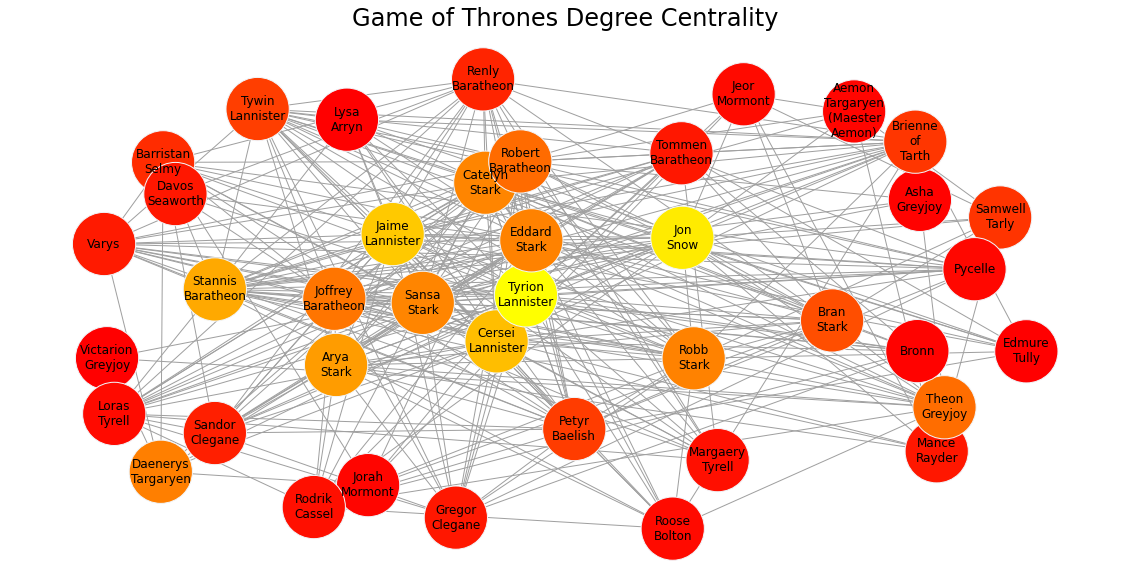

In [27]:
draw(GOT, degree_centrality, 'Game of Thrones Degree Centrality')

**근접 중심성(Closeness Centrality)**

In [28]:
closeness_centrality = nx.closeness_centrality(GOT)
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042)]

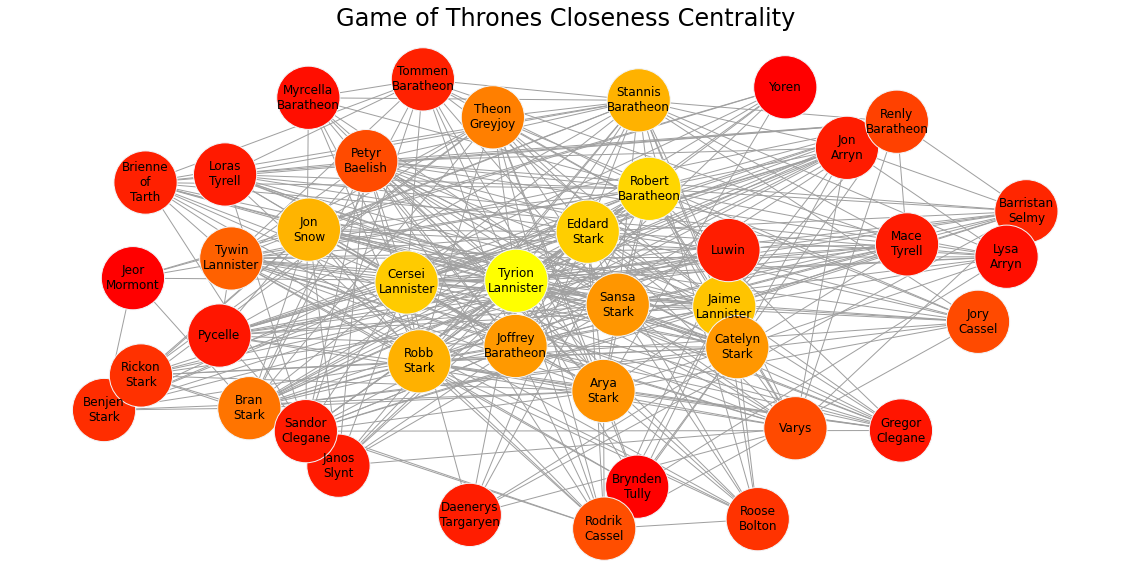

In [29]:
draw(GOT, closeness_centrality, 'Game of Thrones Closeness Centrality')

**매개 중심성(Betweeness Centrality)**

In [30]:
betweeness_centrality = nx.betweenness_centrality(GOT)
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566)]

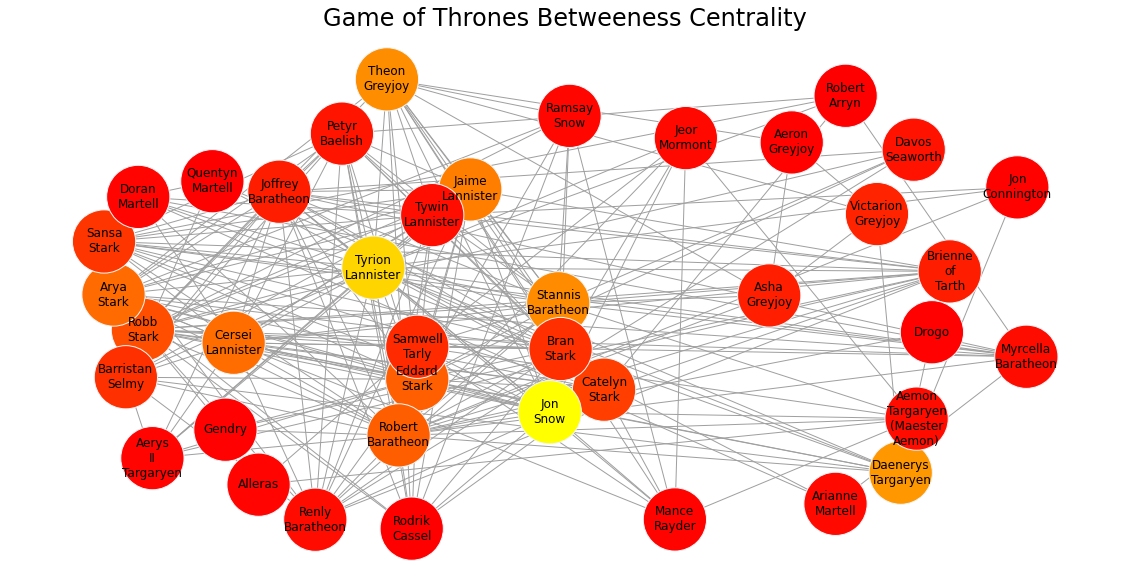

In [31]:
draw(GOT, betweeness_centrality, 'Game of Thrones Betweeness Centrality')

**아이겐벡터 중심성(Eigenvector Centrality)**

In [32]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(GOT)
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])
scaled_eigenvector_centrality = {}

# scaling
for k in eigenvector_centrality.keys():
    scaled_eigenvector_centrality[k] = eigenvector_centrality[k] / max_value[1]

sorted(scaled_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('Tyrion-Lannister', 1.0),
 ('Cersei-Lannister', 0.9372602623822506),
 ('Jaime-Lannister', 0.8997592744834941),
 ('Joffrey-Baratheon', 0.852192472766239),
 ('Sansa-Stark', 0.8182759796697918)]

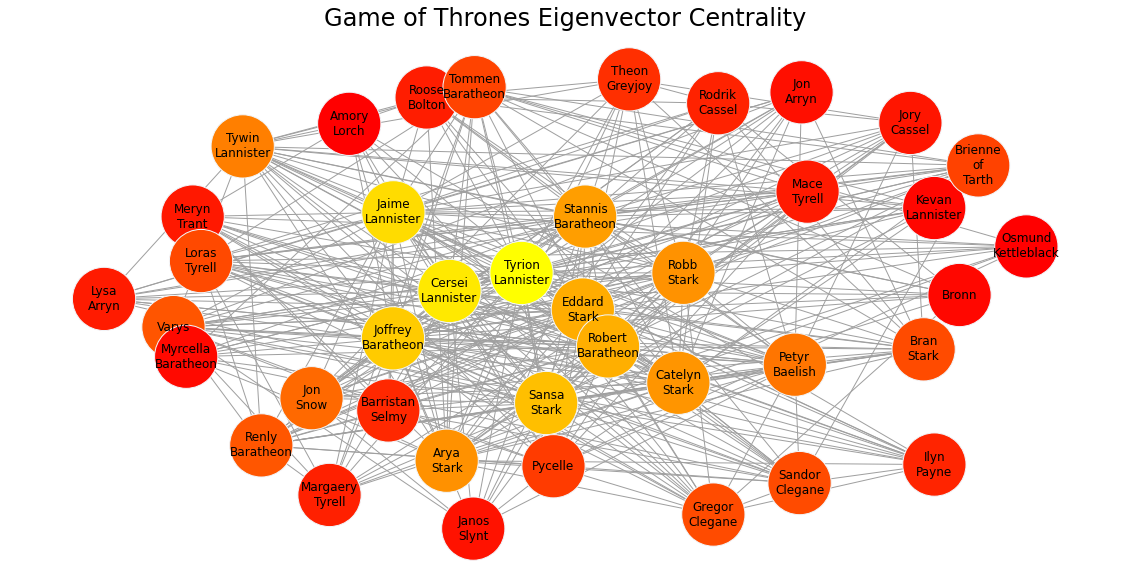

In [33]:
draw(GOT, scaled_eigenvector_centrality, 'Game of Thrones Eigenvector Centrality')